In [59]:
import geopandas as gpd
import pandas as pd

### Get shape file of the suburbs

In [73]:
city='melbourne'
central_suburbs = gpd.read_file(f"../../../data/SpatialData/MelbourneSuburbs.shp")
central_suburbs = central_suburbs[['SAL_NAME21', 'geometry']]

### Get gentrification index categories, and join with spatial boundaries

In [61]:
classifications = pd.read_csv(f"../../../data/GentrificationIndex/MelbourneIndex/FromGuardian.csv")
classifications = classifications.merge(central_suburbs, on='SAL_NAME21', how='left')

### Keep only those with boundaries

In [62]:
filtered_df = classifications[classifications['geometry'].notnull()]

### Check plotting

<Axes: >

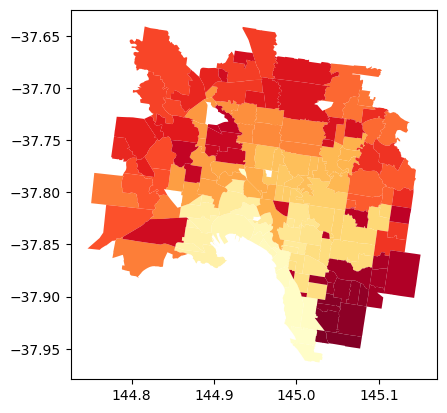

In [63]:
gdf = gpd.GeoDataFrame(filtered_df, geometry=filtered_df['geometry'])
gdf.plot(cmap='YlOrRd')

Not on guardian map: Kingsbury, Essendon Fields, Tottenham, Seaholme, South Wharf, Princes Hill

In [72]:
gdf = gpd.GeoDataFrame(filtered_df, geometry=filtered_df['geometry'], crs= central_suburbs.crs)
center = gdf.geometry.union_all().centroid

m = folium.Map(location=[center.y, center.x], zoom_start=11)

folium.Choropleth(
    geo_data=gdf,
    name="Choropleth",
    data=gdf,
    columns=["SAL_NAME21", "Classification"],  # Replace with your column
    key_on="feature.properties.SAL_NAME21",
    fill_color="YlOrRd",
    fill_opacity=0.9,
    line_opacity=0.2,
    legend_name="Metric Value",
).add_to(m)

# # Add hover tooltips
# folium.GeoJson(
#     central_suburbs,
#     tooltip=folium.GeoJsonTooltip(fields=["SAL_NAME21"], aliases=["Suburb:"]),
#     name="Suburb Labels"
# ).add_to(m)

m


## Remap to 4 categories

In [79]:
mapping = {1: 0,2: 0,3: 1, 4: 1,5: 2,6: 2,7: 3, 8: 3}

filtered_df['classification_new'] = filtered_df['Classification'].map(mapping)
filtered_df.to_csv(f"../../../data/GentrificationIndex/MelbourneIndex/Edited.csv", index=False)

/tmp/ipykernel_21883/3748666840.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['classification_new'] = filtered_df['Classification'].map(mapping)
